# Basic Modeling Benchmarks
In this notebook I will benchmark various learning models using the same data without preprocessing, feature selection, and hyperparameter tuning to get a general idea for which models are performant on the multiclass classifier problem. Resampling will be used in both training and validation to ensure that minority classes get appropriate representation.

8 models that we'll consider:
* Logistic Regression
* SVC with Linear Kernel
* SVC with RBF Kernel
* k-Nearest Neighbors
* Decision Trees
* Artificial Neural Networks
* Naive Bayes
* AdaBoost


In [21]:
# Prepare the data

import ml_utils as mu
from sklearn.model_selection import train_test_split

class_names = ['Control', 'PD', 'MSA', 'PSP']

with mu.HiddenPrints():
    data = mu.get_training_data()
    X, y = mu.resample_to_equal_class_sizes(*mu.split_x_and_y(data))

    valid_data = mu.get_validation_data(data.columns, use_mean_adjusted_data=True)
    X_valid, y_valid = mu.resample_to_equal_class_sizes(*mu.split_x_and_y(valid_data))


X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
----------------------------------
Cross-Validation Mean Accuracy: 0.799405
----------------------------------
Holdout Data Score: 0.837500



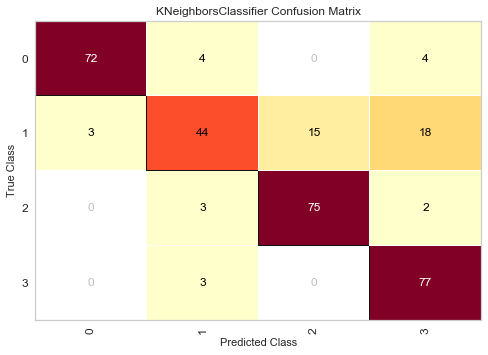


----------------------------------
Validation Data Score: 0.718750



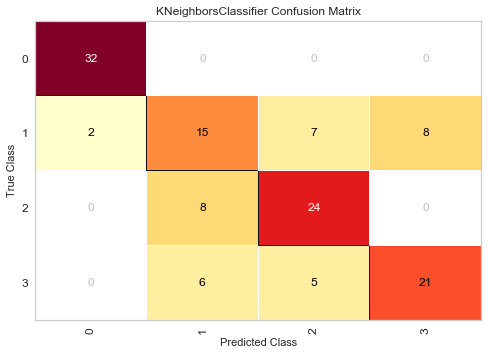


SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.651947
----------------------------------
Holdout Data Score: 0.650000



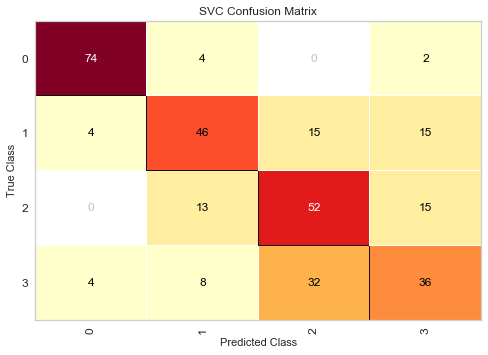


----------------------------------
Validation Data Score: 0.679688



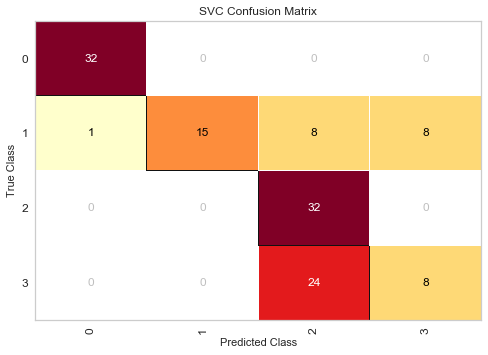


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.934189
----------------------------------
Holdout Data Score: 0.940625



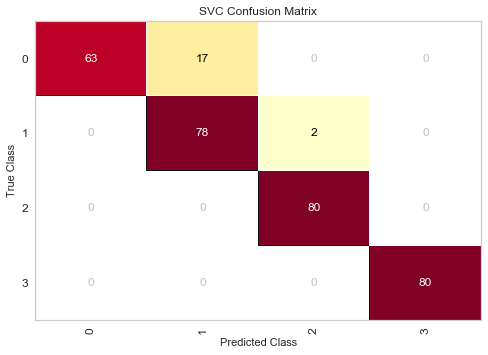


----------------------------------
Validation Data Score: 0.289062



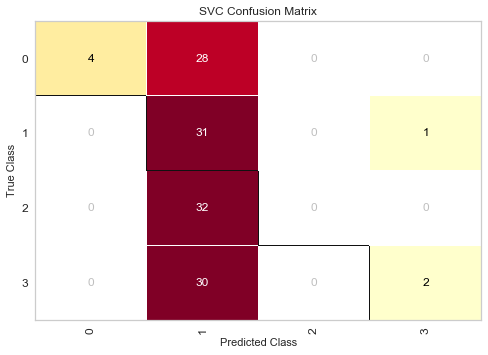

C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.901984
----------------------------------
Holdout Data Score: 0.909375



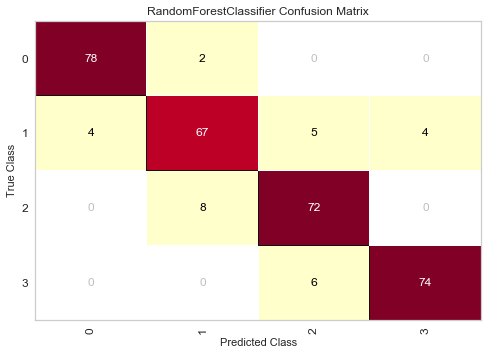


----------------------------------
Validation Data Score: 0.812500



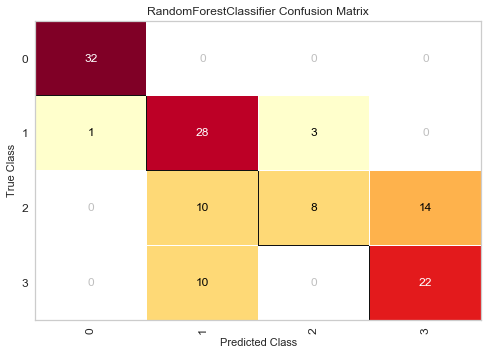


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.595585
----------------------------------
Holdout Data Score: 0.590625



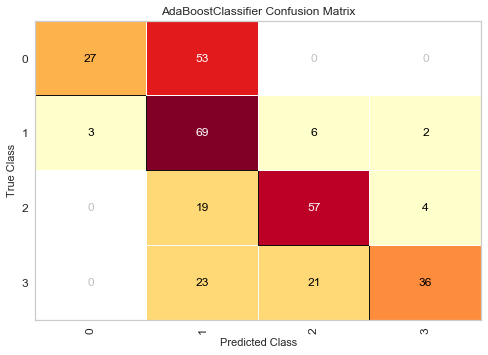


----------------------------------
Validation Data Score: 0.453125



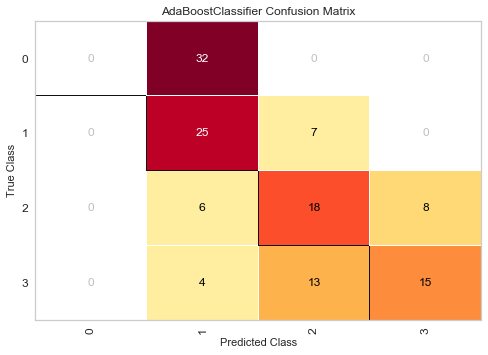


GaussianNB(priors=None)
----------------------------------
Cross-Validation Mean Accuracy: 0.715513
----------------------------------
Holdout Data Score: 0.693750



C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


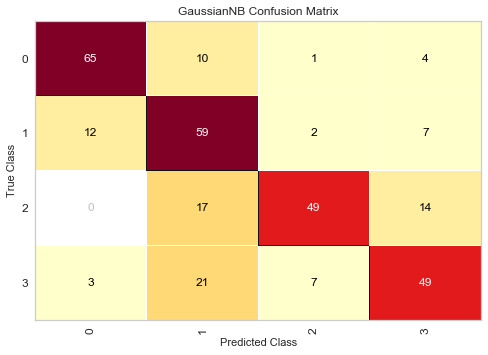


----------------------------------
Validation Data Score: 0.750000



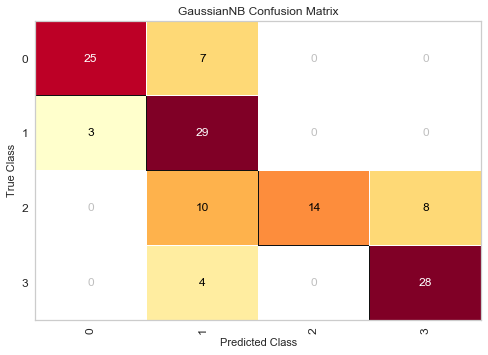


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.843192
----------------------------------
Holdout Data Score: 0.831250



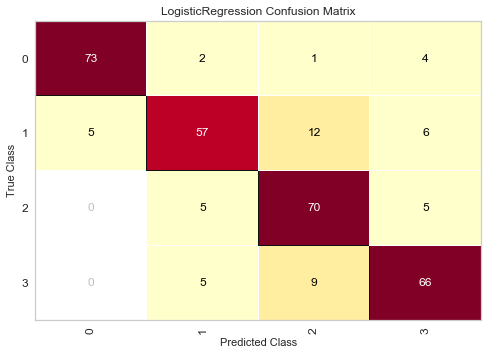


----------------------------------
Validation Data Score: 0.703125



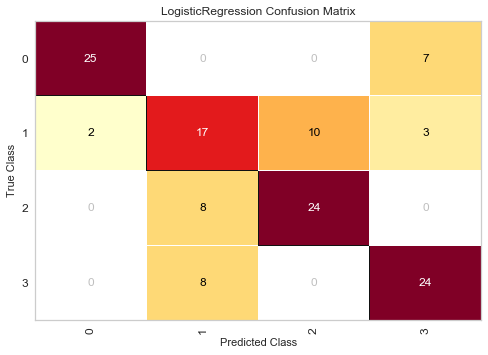


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[25, 25, 25], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
----------------------------------
Cross-Validation Mean Accuracy: 0.611248
----------------------------------
Holdout Data Score: 0.640625



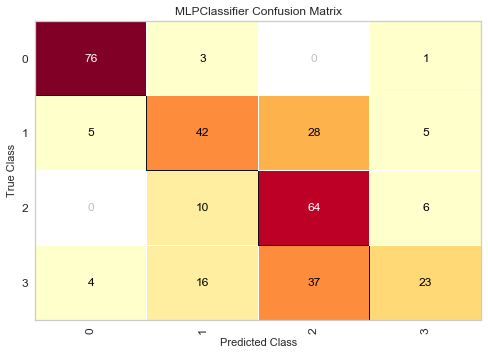


----------------------------------
Validation Data Score: 0.632812



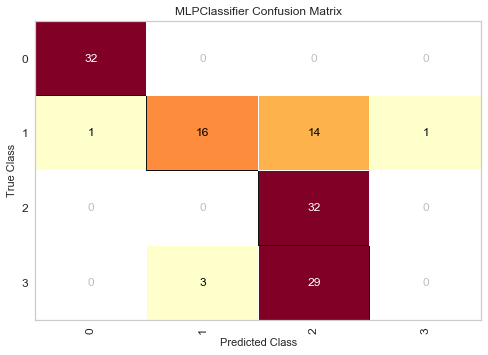

In [49]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support

from yellowbrick.classifier import ConfusionMatrix

classifiers = []

classifiers.append({'name': 'knn', 'model':KNeighborsClassifier(5)})
classifiers.append({'name': 'svc_lin', 'model':SVC(kernel='linear', C=0.025)})
classifiers.append({'name': 'svc_rbf', 'model':SVC(kernel='rbf', gamma=2, C=1)})
classifiers.append({'name': 'rand_for', 'model':RandomForestClassifier(max_depth=5)})
classifiers.append({'name': 'ada', 'model':AdaBoostClassifier()})
classifiers.append({'name': 'gnb', 'model':GaussianNB()})
classifiers.append({'name': 'log', 'model':LogisticRegression(C=1e5)})
classifiers.append({'name': 'ann', 'model':MLPClassifier(hidden_layer_sizes=[25,25,25], alpha=1)})


for classifier in classifiers:
    model = classifier.get('model')
    print("=======================================================================")
    print(model)
    print('----------------------------------')
    print("Cross-Validation Mean Accuracy: %f" %cross_val_score(model, X_train, y_train, cv=StratifiedKFold(5)).mean())
    print('----------------------------------')
    cm = ConfusionMatrix(model, classes=[0,1,2,3])
    cm.fit(X_train, y_train)
        
    holdout_acc = model.score(X_holdout, y_holdout)
    print("Holdout Data Score: %f" %holdout_acc)
    print()
    cm.score(X_holdout, y_holdout)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_holdout, model.predict(X_holdout))
    classifier['holdout_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['holdout_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['holdout_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['holdout_acc'] = holdout_acc
    print()
    print('----------------------------------')
    valid_acc = model.score(X_valid, y_valid)
    print("Validation Data Score: %f" %valid_acc)
    print()
    cm = ConfusionMatrix(model, classes=[0,1,2,3])
    cm.fit(X_train, y_train)
    cm.score(X_valid, y_valid)
    cm.poof()
    precision, recall, f1, _ = precision_recall_fscore_support(y_valid, model.predict(X_valid))
    classifier['valid_precision'] = {i: precision[i] for i in range(len(precision))}
    classifier['valid_recall'] = {i: recall[i] for i in range(len(recall))}
    classifier['valid_f1'] = {i: f1[i] for i in range(len(f1))}
    classifier['valid_acc'] = valid_acc
    
    print()    

In [72]:
import pandas as pd
df = pd.DataFrame(classifiers)
df

,holdout_f1,holdout_precision,holdout_recall,model,name,valid_f1,valid_precision,valid_recall
0,"{0: 0.929032258065, 1: 0.65671641791, 2: 0.882...","{0: 0.96, 1: 0.814814814815, 2: 0.833333333333...","{0: 0.9, 1: 0.55, 2: 0.9375, 3: 0.9625}","KNeighborsClassifier(algorithm='auto', leaf_si...",knn,"{0: 0.969696969697, 1: 0.491803278689, 2: 0.70...","{0: 0.941176470588, 1: 0.51724137931, 2: 0.666...","{0: 1.0, 1: 0.46875, 2: 0.75, 3: 0.65625}"
1,"{0: 0.913580246914, 1: 0.609271523179, 2: 0.58...","{0: 0.90243902439, 1: 0.647887323944, 2: 0.525...","{0: 0.925, 1: 0.575, 2: 0.65, 3: 0.45}","SVC(C=0.025, cache_size=200, class_weight=None...",svc_lin,"{0: 0.984615384615, 1: 0.63829787234, 2: 0.666...","{0: 0.969696969697, 1: 1.0, 2: 0.5, 3: 0.5}","{0: 1.0, 1: 0.46875, 2: 1.0, 3: 0.25}"
2,"{0: 0.881118881119, 1: 0.891428571429, 2: 0.98...","{0: 1.0, 1: 0.821052631579, 2: 0.975609756098,...","{0: 0.7875, 1: 0.975, 2: 1.0, 3: 1.0}","SVC(C=1, cache_size=200, class_weight=None, co...",svc_rbf,"{0: 0.222222222222, 1: 0.40522875817, 2: 0.0, ...","{0: 1.0, 1: 0.256198347107, 2: 0.0, 3: 0.66666...","{0: 0.125, 1: 0.96875, 2: 0.0, 3: 0.0625}"
3,"{0: 0.962962962963, 1: 0.853503184713, 2: 0.88...","{0: 0.951219512195, 1: 0.87012987013, 2: 0.867...","{0: 0.975, 1: 0.8375, 2: 0.9, 3: 0.925}","(DecisionTreeClassifier(class_weight=None, cri...",rand_for,"{0: 0.984615384615, 1: 0.7, 2: 0.372093023256,...","{0: 0.969696969697, 1: 0.583333333333, 2: 0.72...","{0: 1.0, 1: 0.875, 2: 0.25, 3: 0.6875}"
4,"{0: 0.490909090909, 1: 0.565573770492, 2: 0.69...","{0: 0.9, 1: 0.420731707317, 2: 0.678571428571,...","{0: 0.3375, 1: 0.8625, 2: 0.7125, 3: 0.45}","(DecisionTreeClassifier(class_weight=None, cri...",ada,"{0: 0.0, 1: 0.505050505051, 2: 0.514285714286,...","{0: 0.0, 1: 0.373134328358, 2: 0.473684210526,...","{0: 0.0, 1: 0.78125, 2: 0.5625, 3: 0.46875}"
5,"{0: 0.8125, 1: 0.631016042781, 2: 0.7050359712...","{0: 0.8125, 1: 0.551401869159, 2: 0.8305084745...","{0: 0.8125, 1: 0.7375, 2: 0.6125, 3: 0.6125}",GaussianNB(priors=None),gnb,"{0: 0.833333333333, 1: 0.707317073171, 2: 0.60...","{0: 0.892857142857, 1: 0.58, 2: 1.0, 3: 0.7777...","{0: 0.78125, 1: 0.90625, 2: 0.4375, 3: 0.875}"
6,"{0: 0.924050632911, 1: 0.765100671141, 2: 0.81...","{0: 0.935897435897, 1: 0.826086956522, 2: 0.76...","{0: 0.9125, 1: 0.7125, 2: 0.875, 3: 0.825}","LogisticRegression(C=100000.0, class_weight=No...",log,"{0: 0.847457627119, 1: 0.523076923077, 2: 0.72...","{0: 0.925925925926, 1: 0.515151515152, 2: 0.70...","{0: 0.78125, 1: 0.53125, 2: 0.75, 3: 0.75}"
7,"{0: 0.921212121212, 1: 0.556291390728, 2: 0.61...","{0: 0.894117647059, 1: 0.591549295775, 2: 0.49...","{0: 0.95, 1: 0.525, 2: 0.8, 3: 0.2875}","MLPClassifier(activation='relu', alpha=1, batc...",ann,"{0: 0.984615384615, 1: 0.627450980392, 2: 0.59...","{0: 0.969696969697, 1: 0.842105263158, 2: 0.42...","{0: 1.0, 1: 0.5, 2: 1.0, 3: 0.0}"


__TODO__: Find some way of unpacking and visualizing this by model and class